# RDDT Time Series Analysis

## Imports

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from pandas.tseries.offsets import CustomBusinessDay
import pandas_market_calendars as mcal
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from sklearn.metrics import root_mean_squared_error
import itertools
import warnings
warnings.filterwarnings('ignore')

## EDA

### Initial Data Checks

In [2]:
# Make ticker object

rddt = yf.Ticker('RDDT')

In [3]:
# Dataframe with prices

prices = rddt.history(period='1y', interval='1d')
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-04-08 00:00:00-04:00 to 2025-04-07 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Volume        251 non-null    int64  
 5   Dividends     251 non-null    float64
 6   Stock Splits  251 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.7 KB


In [4]:
# head check

prices.head(25)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-04-08 00:00:00-04:00,47.860001,49.180000,45.040001,46.150002,2661500,0.0,0.0
2024-04-09 00:00:00-04:00,46.400002,47.490002,44.900002,45.000000,2277300,0.0,0.0
2024-04-10 00:00:00-04:00,44.000000,44.598000,41.720001,42.090000,4350100,0.0,0.0
2024-04-11 00:00:00-04:00,42.049999,46.349998,42.009998,44.529999,4263000,0.0,0.0
2024-04-12 00:00:00-04:00,43.470001,43.860001,42.160000,42.270000,2021300,0.0,0.0
2024-04-15 00:00:00-04:00,41.939999,42.099998,39.680000,40.000000,3448500,0.0,0.0
2024-04-16 00:00:00-04:00,40.500000,42.139999,39.320000,41.139999,1699000,0.0,0.0
2024-04-17 00:00:00-04:00,40.400002,40.605000,38.700001,39.169998,2153800,0.0,0.0
2024-04-18 00:00:00-04:00,38.799999,42.130001,37.349998,41.720001,2284100,0.0,0.0


In [5]:
# Make df with only close prices

close_prices = prices[['Close']]

In [6]:
#head check

close_prices.head(50)

,Close
Date,
2024-04-08 00:00:00-04:00,46.150002
2024-04-09 00:00:00-04:00,45.000000
2024-04-10 00:00:00-04:00,42.090000
2024-04-11 00:00:00-04:00,44.529999
2024-04-12 00:00:00-04:00,42.270000
2024-04-15 00:00:00-04:00,40.000000
2024-04-16 00:00:00-04:00,41.139999
2024-04-17 00:00:00-04:00,39.169998
2024-04-18 00:00:00-04:00,41.720001


In [7]:
# Set custom frequency to account for holidays and business days

from pandas.tseries.offsets import CustomBusinessHour
nyse = mcal.get_calendar('NYSE')
market_holidays = nyse.holidays().holidays
cbd = CustomBusinessDay(holidays=market_holidays)
close_prices.index.freq = cbd

In [8]:
#info check

close_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-04-08 00:00:00-04:00 to 2025-04-07 00:00:00-04:00
Freq: C
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   251 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


<Axes: xlabel='Date'>

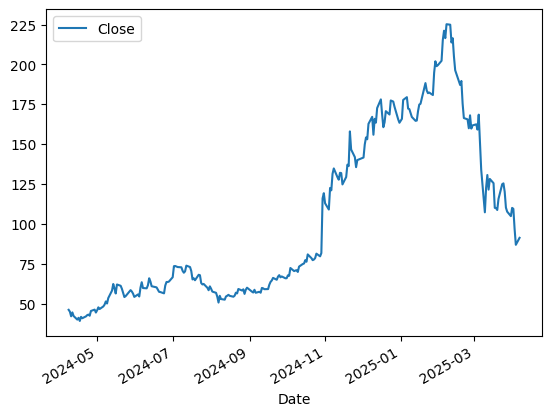

In [9]:
# Plot prices

close_prices.plot()

### Stationarity

#### Mean and Variance

In [10]:
# Log close price to smooth variance, and difference logged prices to smooth mean

close_prices['close_log'] = np.log(close_prices['Close'])
close_prices['close_diff_log'] = close_prices['close_log'].diff()

<Axes: xlabel='Date'>

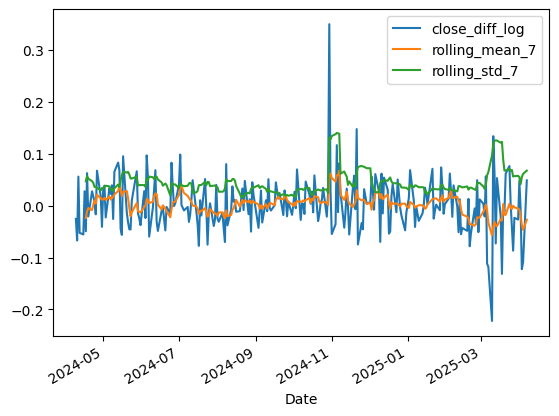

In [11]:
# Check rolling average and std dev for constant

close_prices['rolling_mean_7'] = close_prices['close_diff_log'].rolling(7).mean()
close_prices['rolling_std_7'] = close_prices['close_diff_log'].rolling(7).std()
close_prices[['close_diff_log', 'rolling_mean_7', 'rolling_std_7']].plot()

In [12]:
# Head check

close_prices.head(20)

,Close,close_log,close_diff_log,rolling_mean_7,rolling_std_7
Date,,,,,
2024-04-08 00:00:00-04:00,46.150002,3.831897,NaN,NaN,NaN
2024-04-09 00:00:00-04:00,45.000000,3.806662,-0.025235,NaN,NaN
2024-04-10 00:00:00-04:00,42.090000,3.739810,-0.066852,NaN,NaN
2024-04-11 00:00:00-04:00,44.529999,3.796163,0.056353,NaN,NaN
2024-04-12 00:00:00-04:00,42.270000,3.744078,-0.052085,NaN,NaN
2024-04-15 00:00:00-04:00,40.000000,3.688879,-0.055198,NaN,NaN
2024-04-16 00:00:00-04:00,41.139999,3.716981,0.028101,NaN,NaN
2024-04-17 00:00:00-04:00,39.169998,3.667911,-0.049070,-0.023427,0.047253
2024-04-18 00:00:00-04:00,41.720001,3.730981,0.063070,-0.010812,0.057390


In [13]:
# Check ad fuller for stationary

close_adf = adfuller(close_prices['close_diff_log'].dropna())
close_adf

(np.float64(-12.451974600049752),
 np.float64(3.55875672128334e-23),
 1,
 248,
 {'1%': np.float64(-3.4569962781990573),
  '5%': np.float64(-2.8732659015936024),
  '10%': np.float64(-2.573018897632674)},
 np.float64(-713.0631386364292))

#### Seasonality

In [14]:
# Check for seasonal variation - make weekly monthly and quarterly period objects

season_check_week = seasonal_decompose(close_prices['close_log'], period = 5)
season_check_mnth = seasonal_decompose(close_prices['close_log'], period = 21)
season_check_qtr = seasonal_decompose(close_prices['close_log'], period = 63)


_**Plot isn't able to be resized on its own, need to manually make so it can be resized for readability**_


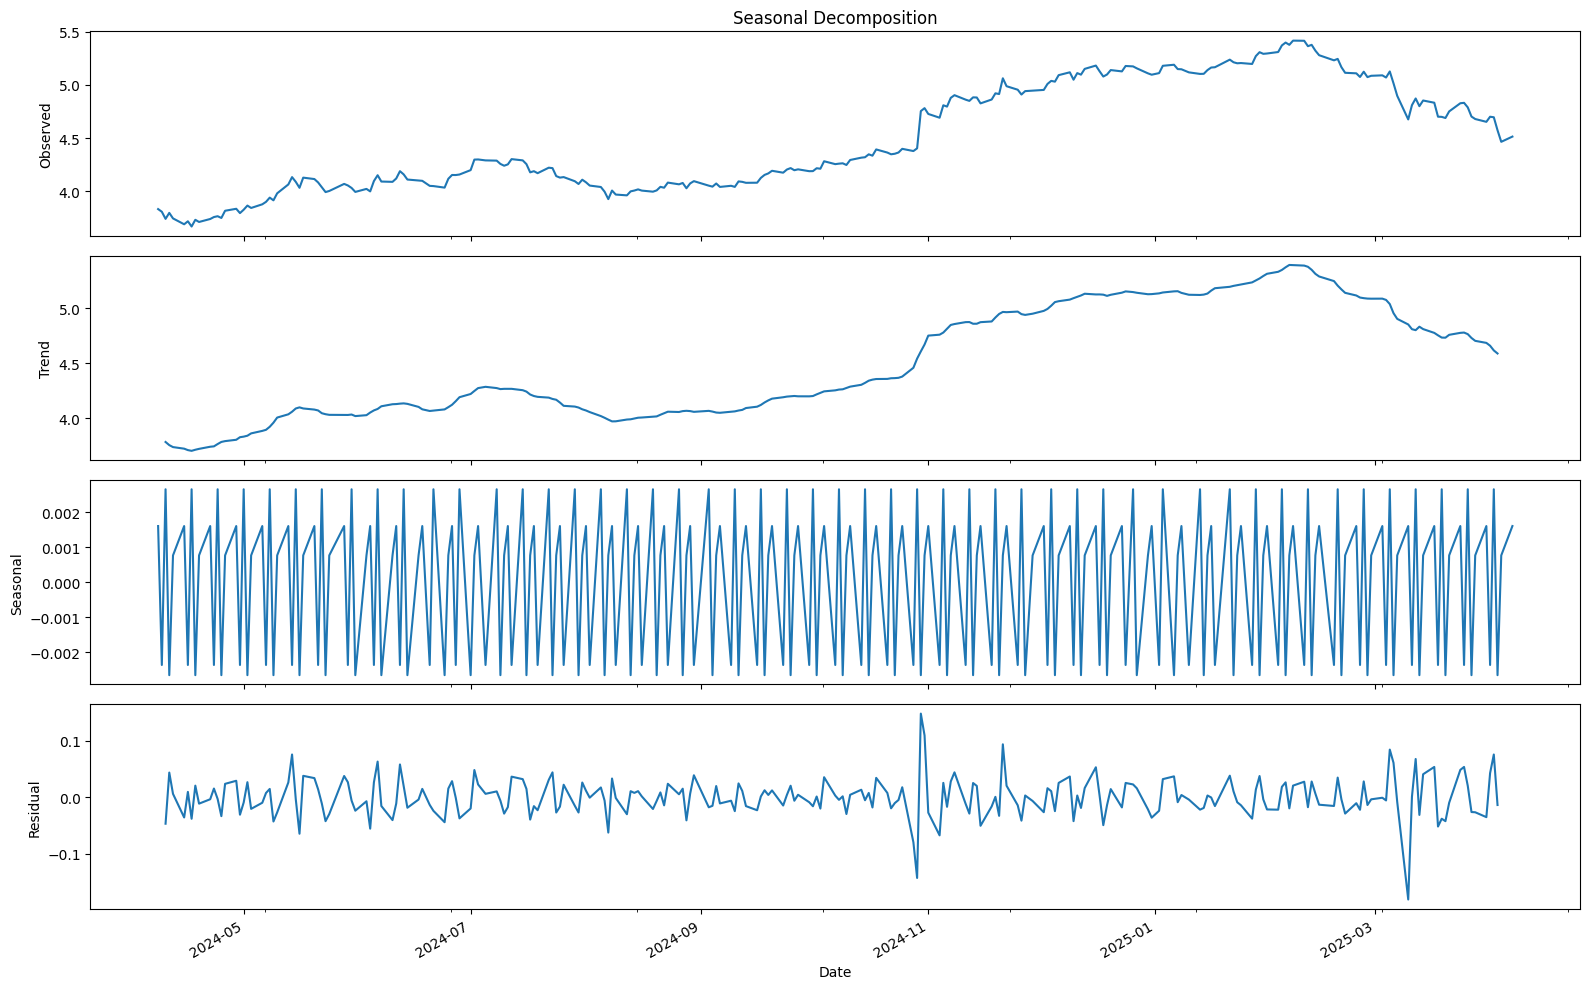

In [15]:
# Weekly

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 10), sharex=True)

season_check_week.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
ax1.set_title('Seasonal Decomposition')

season_check_week.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')

season_check_week.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')

season_check_week.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')

plt.tight_layout();


_**Magnitude of "seasonal" moves is de minimis**_

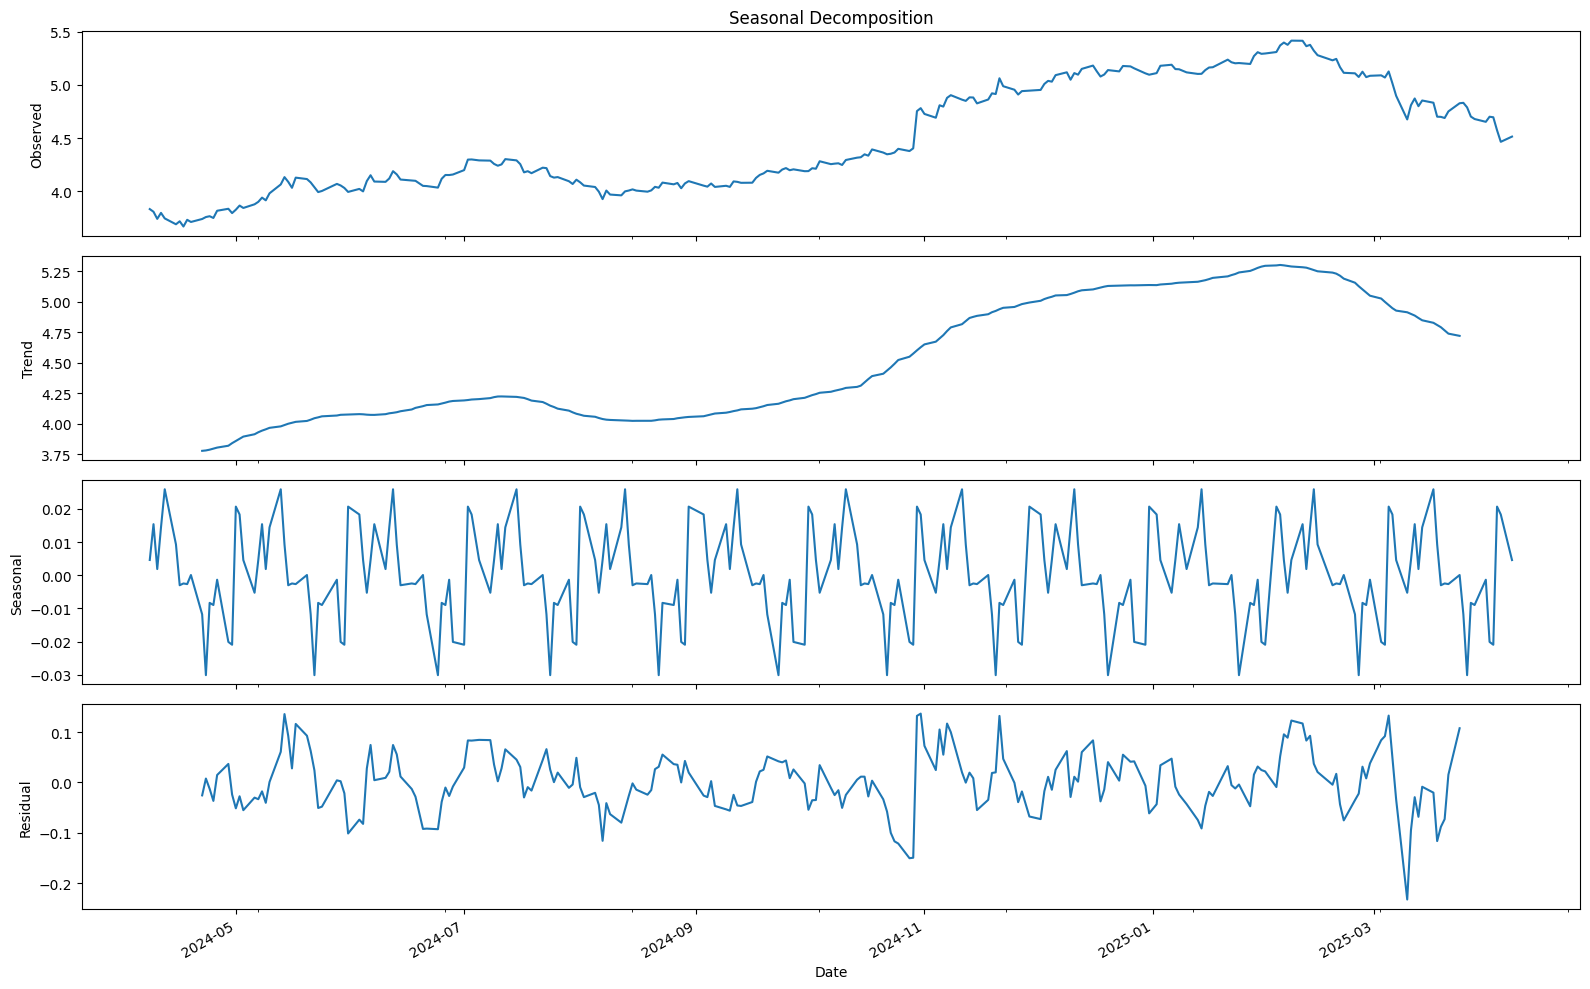

In [16]:
# Monthly

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 10), sharex=True)

season_check_mnth.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
ax1.set_title('Seasonal Decomposition')

season_check_mnth.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')

season_check_mnth.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')

season_check_mnth.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')

plt.tight_layout();

_**Magnitude of "seasonal" moves is de minimis**_

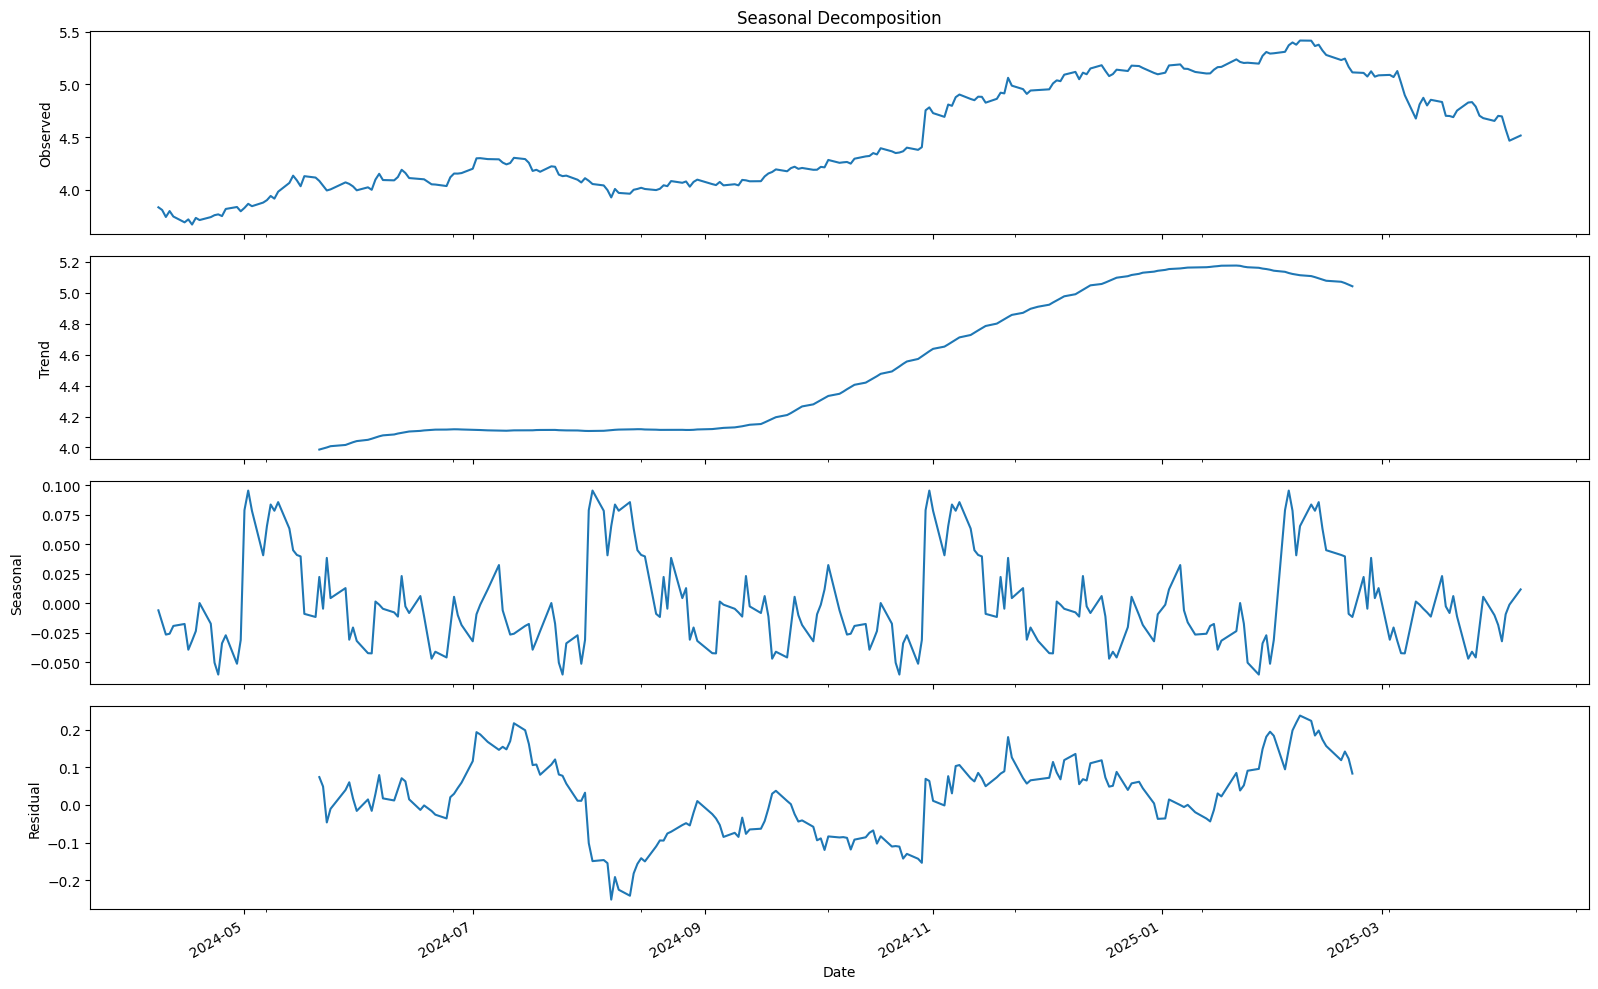

In [17]:
# Quarterly

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 10), sharex=True)

season_check_qtr.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
ax1.set_title('Seasonal Decomposition')

season_check_qtr.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')

season_check_qtr.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')

season_check_qtr.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')

plt.tight_layout();

_**Magnitude of "seasonal" moves is de minimis**_

### Modeling

#### ACF/PACF Plots

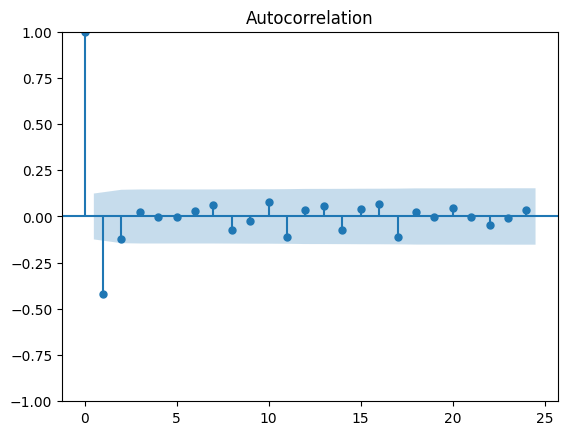

In [18]:
# Plot ACF to find value of Q for model

plot_acf(close_prices['close_diff_log'].diff().dropna());

# Q equals 1

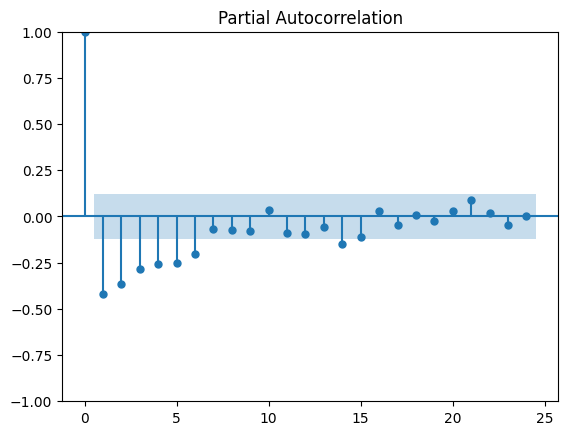

In [19]:
# Plot PACF to find value of P for model

plot_pacf(close_prices['close_diff_log'].diff().dropna());

# P equals 6

In [20]:
# Set Values for models

p = 6
d = 1
q = 1

#### Fit and Analyze

In [21]:
# Train test split, using logged but undifferenced prices

train_log, test_log = train_test_split(close_prices['close_log'], test_size=50, shuffle=False)
display(train_log.tail())
display(test_log.head())

Date
2025-01-17 00:00:00-05:00    5.166670
2025-01-21 00:00:00-05:00    5.238143
2025-01-22 00:00:00-05:00    5.213522
2025-01-23 00:00:00-05:00    5.203952
2025-01-24 00:00:00-05:00    5.206202
Freq: C, Name: close_log, dtype: float64

Date
2025-01-27 00:00:00-05:00    5.197557
2025-01-28 00:00:00-05:00    5.271717
2025-01-29 00:00:00-05:00    5.308268
2025-01-30 00:00:00-05:00    5.292953
2025-01-31 00:00:00-05:00    5.296065
Freq: C, Name: close_log, dtype: float64

In [22]:
# fit model with parameters above

model6_1_1 = ARIMA(train_log, order=(p, d, q))
results = model6_1_1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              close_log   No. Observations:                  201
Model:                 ARIMA(6, 1, 1)   Log Likelihood                 329.695
Date:                Mon, 07 Apr 2025   AIC                           -643.390
Time:                        07:55:25   BIC                           -617.004
Sample:                    04-08-2024   HQIC                          -632.712
                         - 01-24-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4083      0.560      0.729      0.466      -0.689       1.506
ar.L2         -0.1117      0.105     -1.068      0.286      -0.317       0.093
ar.L3          0.0512      0.111      0.459      0.646      -0.167       0.270
ar.L4          0.0866      0.076      1.140      0.254      -0.062       0.235
ar.L5          0.0167      0.096      0.174      0.862      -0.171       0.204
ar.L6          0.0933      0.101      0.928      0.353      -0.104       0.290
ma.L1         -0.4423      0.562     -0.787      0.431      -1.544       0.659
sigma2         0.0022   8.99e-05     24.067      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              1820.66
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               1.84   Skew:                             2.26
Prob(H) (two-sided):                  0.01   Kurtosis:                        17.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
# Make forecast

forecast = results.forecast(steps=len(test_log))
forecast

2025-01-27 00:00:00-05:00    5.218007
2025-01-28 00:00:00-05:00    5.221390
2025-01-29 00:00:00-05:00    5.226998
2025-01-30 00:00:00-05:00    5.227253
2025-01-31 00:00:00-05:00    5.227071
2025-02-03 00:00:00-05:00    5.227955
2025-02-04 00:00:00-05:00    5.229993
2025-02-05 00:00:00-05:00    5.231148
2025-02-06 00:00:00-05:00    5.231949
2025-02-07 00:00:00-05:00    5.232349
2025-02-10 00:00:00-05:00    5.232656
2025-02-11 00:00:00-05:00    5.232995
2025-02-12 00:00:00-05:00    5.233398
2025-02-13 00:00:00-05:00    5.233696
2025-02-14 00:00:00-05:00    5.233898
2025-02-18 00:00:00-05:00    5.234040
2025-02-19 00:00:00-05:00    5.234160
2025-02-20 00:00:00-05:00    5.234267
2025-02-21 00:00:00-05:00    5.234365
2025-02-24 00:00:00-05:00    5.234443
2025-02-25 00:00:00-05:00    5.234500
2025-02-26 00:00:00-05:00    5.234545
2025-02-27 00:00:00-05:00    5.234582
2025-02-28 00:00:00-05:00    5.234614
2025-03-03 00:00:00-05:00    5.234640
2025-03-04 00:00:00-05:00    5.234661
2025-03-05 0

<Axes: xlabel='Date'>

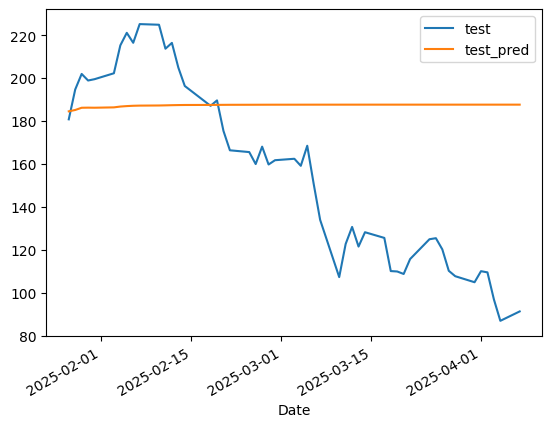

In [24]:
# Make dataframe for charting and comparison

test_results = pd.DataFrame(columns=['test', 'test_pred'])
test_results['test'] = np.exp(test_log)
test_results['test_pred'] = np.exp(forecast)
test_results.plot()


In [25]:
# make table with results

rmse_results = pd.DataFrame(columns=['model', 'rmse'])
rmse_results.loc[len(rmse_results)] = ['6/1/1 ARIMA', root_mean_squared_error(forecast, test_log)]
rmse_results

,model,rmse
0,6/1/1 ARIMA,0.356516


_**Forecasts are a stright line and don't look to be fit correctly. Will try some other options to get better forecasts**_

In [26]:
# Use autoArima to find best PDQ combination

pmarima = pm.AutoARIMA(start_p=0, max_p=12, start_d=0, max_d=3, start_q=0, max_q=8, seasonal=False,
                        random_state=42, stepwise=False, suppress_warnings=True,
                        max_order=None)
auto_fitted = pmarima.fit(train_log.dropna())

In [27]:
# Check params for best combo

auto_fitted.model_.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (2, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [28]:
# Check summary

auto_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  201
Model:               SARIMAX(2, 1, 0)   Log Likelihood                 330.352
Date:                Mon, 07 Apr 2025   AIC                           -652.704
Time:                        07:56:52   BIC                           -639.511
Sample:                    04-08-2024   HQIC                          -647.365
                         - 01-24-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0083      0.004      2.053      0.040       0.000       0.016
ar.L1         -0.0444      0.078     -0.568      0.570      -0.198       0.109
ar.L2         -0.1500      0.084     -1.783      0.075      -0.315       0.015
sigma2         0.0022   9.91e-05     21.712      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1622.31
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.88   Skew:                             2.20
Prob(H) (two-sided):                  0.01   Kurtosis:                        16.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
# Make predictions and confidence interval for auto fitted

auto_test_pred, confs = auto_fitted.model_.predict(n_periods=len(test_log), return_conf_int=True)
auto_test_pred

2025-01-27 00:00:00-05:00    5.215844
2025-01-28 00:00:00-05:00    5.223386
2025-01-29 00:00:00-05:00    5.229912
2025-01-30 00:00:00-05:00    5.236798
2025-01-31 00:00:00-05:00    5.243821
2025-02-03 00:00:00-05:00    5.250784
2025-02-04 00:00:00-05:00    5.257728
2025-02-05 00:00:00-05:00    5.264683
2025-02-06 00:00:00-05:00    5.271640
2025-02-07 00:00:00-05:00    5.278595
2025-02-10 00:00:00-05:00    5.285550
2025-02-11 00:00:00-05:00    5.292505
2025-02-12 00:00:00-05:00    5.299461
2025-02-13 00:00:00-05:00    5.306416
2025-02-14 00:00:00-05:00    5.313371
2025-02-18 00:00:00-05:00    5.320326
2025-02-19 00:00:00-05:00    5.327282
2025-02-20 00:00:00-05:00    5.334237
2025-02-21 00:00:00-05:00    5.341192
2025-02-24 00:00:00-05:00    5.348147
2025-02-25 00:00:00-05:00    5.355103
2025-02-26 00:00:00-05:00    5.362058
2025-02-27 00:00:00-05:00    5.369013
2025-02-28 00:00:00-05:00    5.375968
2025-03-03 00:00:00-05:00    5.382924
2025-03-04 00:00:00-05:00    5.389879
2025-03-05 0

<Axes: xlabel='Date'>

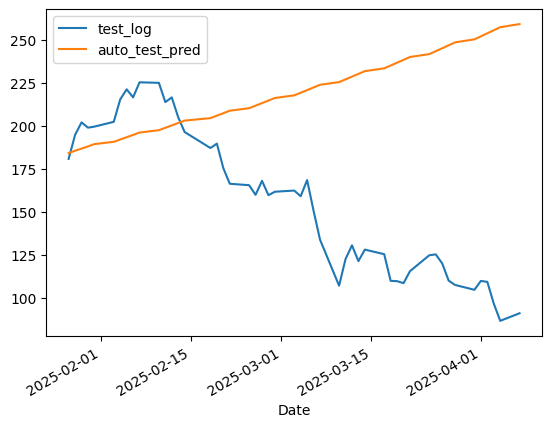

In [30]:
# Plot predictions and actual numbers from auto ARIMA

auto_test_results = pd.DataFrame(columns=['test_log', 'auto_test_pred'])
auto_test_results['test_log'] = np.exp(test_log)
auto_test_results['auto_test_pred'] = np.exp(auto_test_pred)
auto_test_results.plot()

In [31]:
# Add auto ARIMA RMSE to RMSE table

rmse_results.loc[len(rmse_results)] = ['2/1/0 autoARIMA', root_mean_squared_error(auto_test_pred, test_log)]
rmse_results

,model,rmse
0,6/1/1 ARIMA,0.356516
1,2/1/0 autoARIMA,0.529366


_**Both versions (brute force PDQ and auto-ARIMA) gave forecasts that were not in line with the actual results. Will run a loop over various combinations of PDQ to determine if there is a version out there with a better RMSE**_

In [32]:
# Make P and Q ranges thru 9, D thru 2
p_values = range(0, 10)
d_values = range(0, 3)
q_values = range(0, 10)

# Make empty lists for saving results
best_rmse = float('inf')
best_params = None
results = []

# Loop through combos

for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        # Fit ARIMA model
        model = ARIMA(train_log, order=(p, d, q))
        model_fit = model.fit()

        # Make forecast
        forecast = model_fit.forecast(steps=len(test_log))

        # Calculate RMSE
        rmse = root_mean_squared_error(test_log, forecast)

        # Save results
        results.append({
            'p': p,
            'd': d,
            'q': q,
            'rmse': rmse
        })

        # Tag best model
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = (p, d, q)

        print(f"ARIMA({p},{d},{q}) - RMSE: {rmse:.4f}, AIC: {model_fit.aic:.2f}")

    except Exception as e:
        print(f"ARIMA({p},{d},{q}) - Error: {str(e)}")
        continue

# Create DataFrame of results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('rmse')

print(f"BEST MODEL: ARIMA{best_params} with RMSE of {best_rmse:.4f}")


# Fit best model and plot forecast vs actual
best_model = ARIMA(train_log, order=best_params)
best_model_fit = best_model.fit()
forecast = best_model_fit.forecast(steps=len(test_log))


ARIMA(0,0,0) - RMSE: 0.7107, AIC: 260.72
ARIMA(0,0,1) - RMSE: 0.7032, AIC: 16.60
ARIMA(0,0,2) - RMSE: 0.6922, AIC: -158.73
ARIMA(0,0,3) - RMSE: 0.6887, AIC: -278.11
ARIMA(0,0,4) - RMSE: 0.6797, AIC: -355.70
ARIMA(0,0,5) - RMSE: 0.6687, AIC: -409.04
ARIMA(0,0,6) - RMSE: 0.6663, AIC: -433.12
ARIMA(0,0,7) - RMSE: 0.6580, AIC: -464.80
ARIMA(0,0,8) - RMSE: 0.6448, AIC: -494.92
ARIMA(0,0,9) - RMSE: 0.6414, AIC: -501.41
ARIMA(0,1,0) - RMSE: 0.3390, AIC: -649.64
ARIMA(0,1,1) - RMSE: 0.3390, AIC: -647.71
ARIMA(0,1,2) - RMSE: 0.3392, AIC: -648.23
ARIMA(0,1,3) - RMSE: 0.3391, AIC: -646.27
ARIMA(0,1,4) - RMSE: 0.3426, AIC: -646.77
ARIMA(0,1,5) - RMSE: 0.3453, AIC: -645.60
ARIMA(0,1,6) - RMSE: 0.3498, AIC: -644.94
ARIMA(0,1,7) - RMSE: 0.3521, AIC: -643.23
ARIMA(0,1,8) - RMSE: 0.3510, AIC: -641.47
ARIMA(0,1,9) - RMSE: 0.3503, AIC: -640.04
ARIMA(0,2,0) - RMSE: 0.3983, AIC: -504.46
ARIMA(0,2,1) - RMSE: 0.5295, AIC: -642.30
ARIMA(0,2,2) - RMSE: 0.5277, AIC: -640.61
ARIMA(0,2,3) - RMSE: 0.5306, AIC: -64

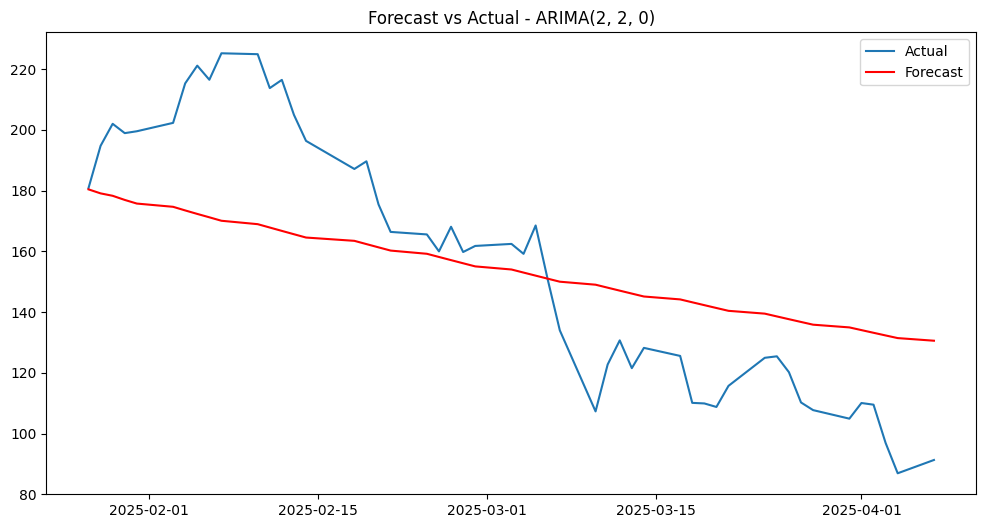

In [37]:
# Plot best model vs actual results with exponentiated targets and predictions

plt.figure(figsize=(12, 6))
plt.plot(test_log.index, np.exp(test_log), label='Actual')
plt.plot(test_log.index, np.exp(forecast), label='Forecast', color='red')
plt.title(f'Forecast vs Actual - ARIMA{best_params}')
plt.legend()
plt.show()

_**This set of predictions moves in the same direction as the actual prices and has the lowest RMSE of all the tested iterations**_

In [34]:
# look at dataframe with RMSE results

results_df.head(50)

,p,d,q,rmse
80,2,2,0,0.191540
151,5,0,1,0.223320
99,3,0,9,0.233464
273,9,0,3,0.238015
212,7,0,2,0.242856
39,1,0,9,0.244698
182,6,0,2,0.248817
211,7,0,1,0.249468
159,5,0,9,0.251454
243,8,0,3,0.255214


In [45]:
# Look at forecasts

np.exp(forecast)

2025-01-27 00:00:00-05:00    180.410355
2025-01-28 00:00:00-05:00    179.089576
2025-01-29 00:00:00-05:00    178.294206
2025-01-30 00:00:00-05:00    176.933006
2025-01-31 00:00:00-05:00    175.735128
2025-02-03 00:00:00-05:00    174.669308
2025-02-04 00:00:00-05:00    173.474439
2025-02-05 00:00:00-05:00    172.323815
2025-02-06 00:00:00-05:00    171.210600
2025-02-07 00:00:00-05:00    170.072297
2025-02-10 00:00:00-05:00    168.950065
2025-02-11 00:00:00-05:00    167.842390
2025-02-12 00:00:00-05:00    166.734287
2025-02-13 00:00:00-05:00    165.635504
2025-02-14 00:00:00-05:00    164.545679
2025-02-18 00:00:00-05:00    163.461193
2025-02-19 00:00:00-05:00    162.384327
2025-02-20 00:00:00-05:00    161.314968
2025-02-21 00:00:00-05:00    160.252214
2025-02-24 00:00:00-05:00    159.196573
2025-02-25 00:00:00-05:00    158.147985
2025-02-26 00:00:00-05:00    157.106199
2025-02-27 00:00:00-05:00    156.071303
2025-02-28 00:00:00-05:00    155.043247
2025-03-03 00:00:00-05:00    154.021939


In [40]:
# add results to RMSE dataframe for comparison

rmse_results.loc[len(rmse_results)] = ['2/2/0 ARIMA', root_mean_squared_error(forecast, test_log)]

In [41]:
# SHow RMSE list

rmse_results.sort_values(by='rmse', ascending=True)

,model,rmse
2,2/2/0 ARIMA,0.191540
0,6/1/1 ARIMA,0.356516
1,2/1/0 autoARIMA,0.529366
